In [208]:
#creating data as per expandeddata.py
import pandas as pd
import numpy as np 
raw = pd.read_csv(r'C:\Users\EdwinE\Desktop\DissProject\Financial data\13-16alldata1.csv',encoding = "ISO-8859-1")
buyers = pd.read_csv(r'C:\Users\EdwinE\Desktop\DissProject\Financial data\buyers.csv',encoding = "ISO-8859-1")
raw['Buyer?']=buyers['Buyer?']

data = raw
data['Net Sales Revenues'] = data['Net Sales Revenues'].fillna(0)
data['Long Term Debt'] = data['Long Term Debt'].fillna(0)
data['Total Debt to Equity (%)'] = data['Total Debt to Equity (%)'].fillna(0)
data['1 year net sales growth'] = data['1 year net sales growth'].fillna(0)
data['Dividend to Cash Flow (%)'] = data['Dividend to Cash Flow (%)'].fillna(0)
data['1 year asset growth'] = data['1 year asset growth'].fillna(0)

data=data[raw.isnull().sum(axis=1) <10]
#size
print("Dataframe size",data.shape)
#COUNT NAN PER COLUMNS
print("Blanks per column",data.isna().sum())
data.head(5)

# all data with no normalization or transformation
data2 = pd.DataFrame([])
data2['Year'] = data['Year']
data2['Company'] = data['Company']
data2['Current Ratio'] = data['Current Ratio']
data2['Quick Ratio'] = data['Quick ratio']
data2['Total Debt to Equity (%)'] = data['Total Debt to Equity (%)']
data2['Long Term Debt Ratio'] = data['Long Term Debt']/data['Total Current Assets']
data2['Long Term Debt Ratio2'] = data['Long Term Debt Ratio'] 
data2['Inventory turnover'] = data['Inventory turnover']
data2['Asset turnover'] = data['Asset Turnover (x)']
data2['Pre-tax Profit - Reported'] = data['Pre-tax Profit - Reported']
data2['Return on Average Equity'] = data['Return on Average Equity']
data2['Return on Average Total Assets'] = data['Return on Average Total Assets']
data2['Net Sales Revenues'] = data['Net Sales Revenues']
data2['Total Current Assets'] = data['Total Current Assets']
data2['1 year net sales growth'] = data['1 year net sales growth']
data2['1 year asset growth'] = data['1 year asset growth']
data2['Dividend to Cash Flow (%)'] = data['Dividend to Cash Flow (%)']
data2['Marketcap'] = data[' Market Capitalisation']
data2['EV/ EBITDA'] = data['EV/ EBITDA - Normalised (x)']
#data2['Price to Book (x)'] = data['Price to Book (x)']
data2['Target?'] = data['Target?']
data2['Buyer?'] = data['Buyer?']
data2 = data2.dropna(subset = ['Marketcap'])
#size
print("Dataframe2 size",data2.shape)
#COUNT NAN PER COLUMNS
print("Blanks per column 2",data2.isna().sum())


Dataframe size (3772, 36)
Blanks per column Year                                 0
Company                              0
Net Sales Revenues                   0
Net Sales Revenues LN              730
Price to Book (x)                  116
Inventories                       1642
Pre-tax Profit - Reported            0
Net Sales Revenues.1               730
Total Current Assets                 0
Assets LN                            1
Total Current Liabilities            0
Total Current Liabilities.1          0
Current Ratio                        0
Quick ratio                          0
Long Term Debt                       0
Long Term Debt Ratio              1619
Average Inventory                 1757
Inventory turnover                 115
Net Assets                           0
Working Capital Movements           57
Return on Average Total Assets      29
Return on Average Equity            28
Asset Turnover (x)                 730
Total Debt to Equity (%)             0
Dividend to Cash Flo

In [230]:
data3 = data2.dropna()
data4 = data2.dropna()
print("Dataframe3 size",data3.shape)
print("Dataframe4 size",data4.shape)
print("Dataframe4 size",data4.columns)
print("Dataframe4 size",data4.head(2))
DTtet2 = data4.query('Year == 2016')
print(DTtet['Company'])

Dataframe3 size (1723, 21)
Dataframe4 size (1723, 21)
Dataframe4 size Index(['Year', 'Company', 'Current Ratio', 'Quick Ratio',
       'Total Debt to Equity (%)', 'Long Term Debt Ratio',
       'Long Term Debt Ratio2', 'Inventory turnover', 'Asset turnover',
       'Pre-tax Profit - Reported', 'Return on Average Equity',
       'Return on Average Total Assets', 'Net Sales Revenues',
       'Total Current Assets', '1 year net sales growth',
       '1 year asset growth', 'Dividend to Cash Flow (%)', 'Marketcap',
       'EV/ EBITDA', 'Target?', 'Buyer?'],
      dtype='object')
Dataframe4 size    Year     Company  Current Ratio  Quick Ratio  Total Debt to Equity (%)  \
1  2013  3-D Matrix       3.748759     2.925055                  0.268658   
2  2013          3M       1.698186     1.182849                  0.343332   

   Long Term Debt Ratio  Long Term Debt Ratio2  Inventory turnover  \
1              0.007890               0.007889            0.216542   
2              0.339747        

C:\Users\EdwinE\AppData\Local\Continuum\anaconda3\envs\myen\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


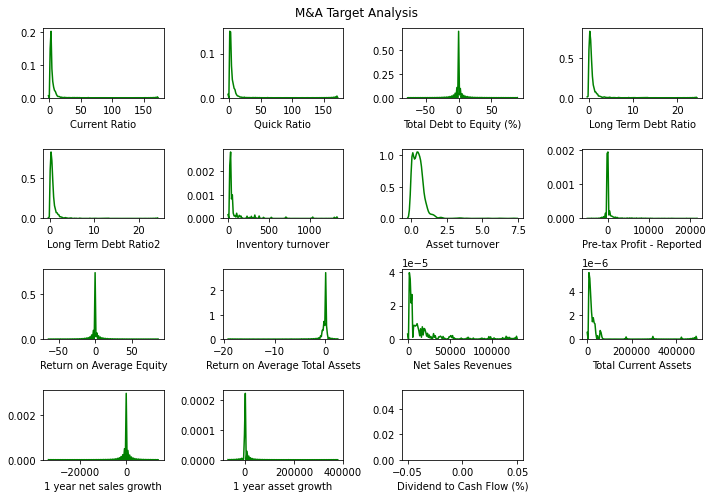

In [6]:
#scaling data via minmax and plotting distribution
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns
xdata = data4.iloc[:,2:17]
min_max_scaler = preprocessing.MinMaxScaler()
xdata2 = min_max_scaler.fit_transform(xdata)
xdata2 = pd.DataFrame(xdata2,columns=data4.iloc[:,2:17].columns)

fig = plt.figure(figsize = (10, 10))
j = 0
for i in xdata.columns:
    plt.subplot(6, 4, j+1)
    j += 1
    sns.distplot(xdata[i], color='g',hist=False)
fig.suptitle('M&A Target Analysis')
fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.show()

C:\Users\EdwinE\AppData\Local\Continuum\anaconda3\envs\myen\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


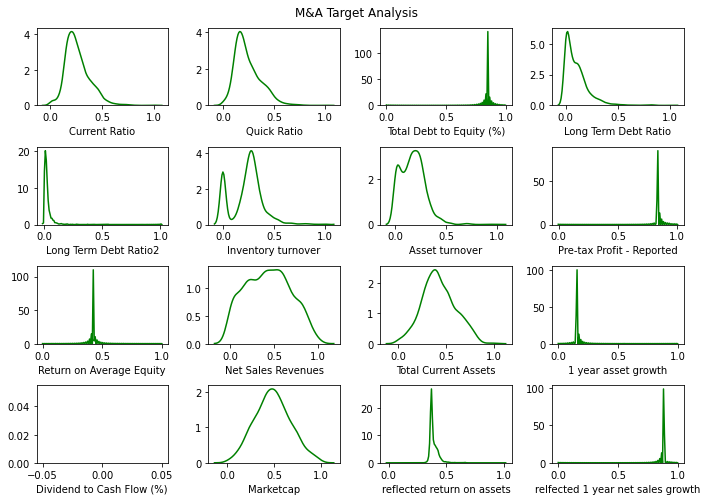

In [9]:
tdata=data4.iloc[:,2:18]
tdata['Current Ratio'] =  np.log((tdata['Current Ratio']+1-min(tdata['Current Ratio'])))
tdata['Quick Ratio'] = np.log((tdata['Quick Ratio']+1-min(tdata['Quick Ratio'])))
tdata['Long Term Debt Ratio'] = np.log((tdata['Long Term Debt Ratio']+1-min(tdata['Long Term Debt Ratio'])))
tdata['Inventory turnover'] = np.log((tdata['Inventory turnover']+1-min(tdata['Inventory turnover'])))
tdata['Asset turnover'] = np.log((tdata['Asset turnover']+1-min(tdata['Asset turnover'])))
tdata['Pre-tax Profit - Reported'] = np.log((tdata['Pre-tax Profit - Reported']+1-min(tdata['Pre-tax Profit - Reported'])))
tdata['Net Sales Revenues'] = np.log((tdata['Net Sales Revenues']+1-min(tdata['Net Sales Revenues'])))
tdata['Total Current Assets'] = np.log((tdata['Total Current Assets']+1-min(tdata['Total Current Assets'])))
#tdata['1 year asset growth'] = np.log((tdata['1 year asset growth']+1-min(tdata['1 year asset growth'])))
tdata['Total Debt to Equity (%)'] = np.log((tdata['Total Debt to Equity (%)']+1-min(tdata['Total Debt to Equity (%)'])))
tdata['Marketcap'] = np.log((tdata['Marketcap']+1-min(tdata['Marketcap'])))
#tdata['Total Debt to Equity (%)'] = np.log((tdata['Total Debt to Equity (%)']+1-min(tdata['Total Debt to Equity (%)'])))
#reflect and transform ['Return on Average Total Assets']
tdata['reflected return on assets'] = np.log((1+max(data4['Return on Average Total Assets']))-data4['Return on Average Total Assets'])
tdata = tdata.drop(['Return on Average Total Assets'],axis=1)

tdata['relfected 1 year net sales growth'] = np.log((1+max(data4['1 year net sales growth']))-data4['1 year net sales growth'])
tdata = tdata.drop(['1 year net sales growth'],axis=1)



from sklearn import preprocessing
xdata = tdata
min_max_scaler = preprocessing.MinMaxScaler()
xdata2 = min_max_scaler.fit_transform(xdata)
xdata2 = pd.DataFrame(xdata2,columns=tdata.columns)

fig = plt.figure(figsize = (10, 10))
j = 0
for i in xdata2.columns:
    plt.subplot(6, 4, j+1)
    j += 1
    sns.distplot(xdata2[i], color='g',hist=False)
fig.suptitle('M&A Target Analysis')
fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.show()

In [ ]:
#scaling data via minmax and plotting distribution
from sklearn import preprocessing
xdata = data4.iloc[:,2:18]
min_max_scaler = preprocessing.MinMaxScaler()
xdata2 = min_max_scaler.fit_transform(xdata)
xdata2 = pd.DataFrame(xdata2,columns=data4.iloc[:,2:18].columns)

fig = plt.figure(figsize = (10, 10))
j = 0
for i in xdata2.columns:
    plt.subplot(6, 4, j+1)
    j += 1
    sns.distplot(xdata2[i], color='g',hist=False)
fig.suptitle('M&A Target Analysis')
fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.show()

                                Current Ratio  Quick Ratio  \
Current Ratio                        1.000000     0.995252   
Quick Ratio                          0.995252     1.000000   
Total Debt to Equity (%)            -0.013734    -0.016104   
Long Term Debt Ratio                -0.292601    -0.294886   
Inventory turnover                  -0.216116    -0.230127   
Asset turnover                      -0.390339    -0.421647   
Pre-tax Profit - Reported           -0.101606    -0.106176   
Return on Average Equity            -0.030666    -0.032960   
Return on Average Total Assets      -0.002521     0.030032   
Net Sales Revenues                  -0.366305    -0.402520   
Total Current Assets                -0.115973    -0.142353   
1 year net sales growth              0.012341     0.012388   
1 year asset growth                  0.030356     0.033092   
Dividend to Cash Flow (%)           -0.105436    -0.112513   
Marketcap                           -0.088908    -0.109186   

       

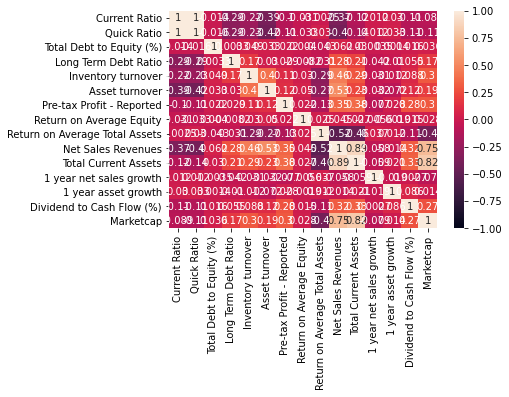

In [35]:
import seaborn as sns
corr = xdata2.corr()
sns.heatmap(corr, vmin=-1, vmax=1, annot=True)
print(corr)

In [112]:
tdata=data4
tdata['Current Ratio'] =  np.log((tdata['Current Ratio']+1-min(tdata['Current Ratio'])))
tdata['Quick Ratio'] = np.log((tdata['Quick Ratio']+1-min(tdata['Quick Ratio'])))
tdata['Long Term Debt Ratio'] = np.log((tdata['Long Term Debt Ratio']+1-min(tdata['Long Term Debt Ratio'])))
tdata['Inventory turnover'] = np.log((tdata['Inventory turnover']+1-min(tdata['Inventory turnover'])))
tdata['Asset turnover'] = np.log((tdata['Asset turnover']+1-min(tdata['Asset turnover'])))
tdata['Pre-tax Profit - Reported'] = np.log((tdata['Pre-tax Profit - Reported']+1-min(tdata['Pre-tax Profit - Reported'])))
tdata['Net Sales Revenues'] = np.log((tdata['Net Sales Revenues']+1-min(tdata['Net Sales Revenues'])))
tdata['Total Current Assets'] = np.log((tdata['Total Current Assets']+1-min(tdata['Total Current Assets'])))
#tdata['1 year asset growth'] = np.log((tdata['1 year asset growth']+1-min(tdata['1 year asset growth'])))
tdata['Total Debt to Equity (%)'] = np.log((tdata['Total Debt to Equity (%)']+1-min(tdata['Total Debt to Equity (%)'])))
tdata['Marketcap'] = np.log((tdata['Marketcap']+1-min(tdata['Marketcap'])))
#tdata['Total Debt to Equity (%)'] = np.log((tdata['Total Debt to Equity (%)']+1-min(tdata['Total Debt to Equity (%)'])))
#reflect and transform ['Return on Average Total Assets']
tdata['Return on Average Total Assets'] = np.log((1+max(data4['Return on Average Total Assets']))-data4['Return on Average Total Assets'])
tdata['1 year net sales growth'] = np.log((1+max(data4['1 year net sales growth']))-data4['1 year net sales growth'])
tdata.to_csv(r'C:\Users\EdwinE\Desktop\DissProject\Financial data\finT.csv',encoding = "ISO-8859-1")


C:\Users\EdwinE\AppData\Local\Continuum\anaconda3\envs\myen\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\EdwinE\AppData\Local\Continuum\anaconda3\envs\myen\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\EdwinE\AppData\Local\Continuum\anaconda3\envs\myen\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A val

In [113]:

from sklearn import preprocessing
#ALTER THESE TO GET INVENTORY turnover back - it gives more samples if removed
pre2016 = tdata.query('Year != 2016')
only2016 = tdata.query('Year == 2016')
#split the features and classes out, removing company name,year and buyer
ytrain = pre2016[['Target?']]
xtrain = pre2016.iloc[:,2:18]
min_max_scaler = preprocessing.MinMaxScaler()
xtrain = min_max_scaler.fit_transform(xtrain)
xtrain = pd.DataFrame(xtrain,columns=pre2016.iloc[:,2:18].columns)
ytest = only2016[['Target?']]
xtest = only2016.iloc[:,2:18]
xtest = min_max_scaler.fit_transform(xtest)
xtest = pd.DataFrame(xtest,columns=pre2016.iloc[:,2:18].columns)
ytest = pd.DataFrame(ytest)
alltrain = xtrain.join(ytrain)
print(ytrain.value_counts())
print(xtrain.head(5))
print(xtrain.describe())

Target?
0          1225
1            22
dtype: int64
   Current Ratio  Quick Ratio  Total Debt to Equity (%)  Long Term Debt Ratio  \
0       0.376410     0.331101                  0.421857              0.002439   
1       0.239777     0.188963                  0.422581              0.090765   
2       0.180645     0.180442                  0.425072              0.230955   
3       0.352779     0.351996                  1.000000              0.167064   
4       0.267373     0.244145                  0.421780              0.050317   

   Long Term Debt Ratio2  Inventory turnover  Asset turnover  \
0               0.000328            0.027222        0.013773   
1               0.014105            0.305421        0.330376   
2               0.045866            0.543770        0.020454   
3               0.029607            0.231517        0.021277   
4               0.007308            0.271462        0.190817   

   Pre-tax Profit - Reported  Return on Average Equity  \
0                

C:\Users\EdwinE\AppData\Local\Continuum\anaconda3\envs\myen\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\EdwinE\AppData\Local\Continuum\anaconda3\envs\myen\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


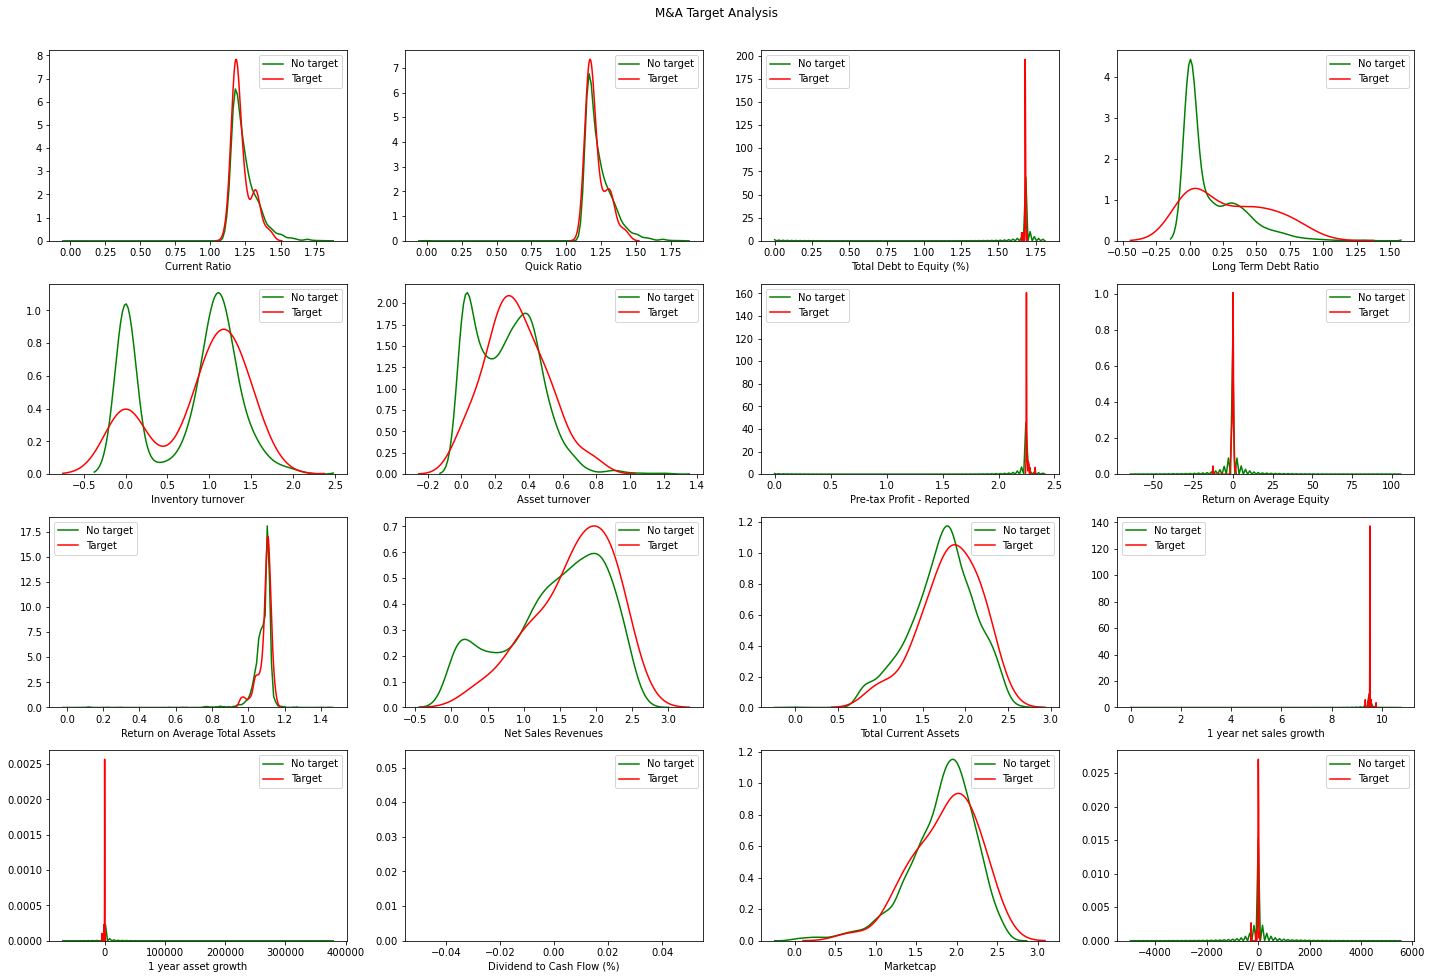

In [41]:

#scaling data via minmax and plotting distribution
from sklearn import preprocessing
xdata = data4.iloc[:,2:18]
min_max_scaler = preprocessing.MinMaxScaler()
xdata2 = min_max_scaler.fit_transform(xdata)
xdata2 = pd.DataFrame(xdata2,columns=data4.iloc[:,2:18].columns)

fig = plt.figure(figsize = (20, 20))
j = 0
for i in xdata2.columns:
    plt.subplot(6, 4, j+1)
    j += 1
    sns.distplot(tdata[i][tdata['Target?']==0], color='g', label = 'No target',hist=False)
    sns.distplot(tdata[i][tdata['Target?']==1], color='r', label = 'Target', hist = False)
fig.suptitle('M&A Target Analysis')
fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.show()

In [114]:
# functions needed for pr_auc_score()
from sklearn.metrics import auc, precision_recall_curve

# sampler objects
from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN
from imblearn.under_sampling import RandomUnderSampler

# Classification models to compare
from sklearn.linear_model import LogisticRegression

#with SMOTE
os = SMOTE(random_state=0, sampling_strategy=0.1)
columns = xtrain.columns
os_data_X,os_data_y=os.fit_sample(xtrain, ytrain)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['Target?'])
print("length of SMOTE data is ",len(os_data_X))
print("Number of no target in SMOTE data",len(os_data_y[os_data_y['Target?']==0]))
print("Number of target",len(os_data_y[os_data_y['Target?']==1]))
print("Proportion of no target data in SMOTE data is ",len(os_data_y[os_data_y['Target?']==0])/len(os_data_X))
print("Proportion of target data in SMOTE data is ",len(os_data_y[os_data_y['Target?']==1])/len(os_data_X))


#with SMOTE2
os = SMOTE(random_state=0)
columns = xtrain.columns
os_data_X3,os_data_y3=os.fit_sample(xtrain, ytrain)
os_data_X3 = pd.DataFrame(data=os_data_X3,columns=columns )
os_data_y3= pd.DataFrame(data=os_data_y3,columns=['Target?'])
print("length of SMOTE data is ",len(os_data_X))
print("Number of no target in SMOTE data",len(os_data_y3[os_data_y3['Target?']==0]))
print("Number of target",len(os_data_y3[os_data_y3['Target?']==1]))
print("Proportion of no target data in SMOTE data is ",len(os_data_y3[os_data_y3['Target?']==0])/len(os_data_X3))
print("Proportion of target data in SMOTE data is ",len(os_data_y3[os_data_y3['Target?']==1])/len(os_data_X3))

#random oversampling
os1 = RandomOverSampler(random_state=0)
os1_data_X,os1_data_y=os1.fit_sample(xtrain, ytrain)
os1_data_X = pd.DataFrame(data=os1_data_X,columns=columns )
os1_data_y= pd.DataFrame(data=os1_data_y,columns=['Target?'])
print("length of oversampled data is ",len(os1_data_X))
print("Number of no target in oversampled data",len(os1_data_y[os1_data_y['Target?']==0]))
print("Number of target",len(os1_data_y[os1_data_y['Target?']==1]))
print("Proportion of no target data in oversampled data is ",len(os1_data_y[os1_data_y['Target?']==0])/len(os1_data_X))
print("Proportion of target data in oversampled data is ",len(os1_data_y[os1_data_y['Target?']==1])/len(os1_data_X))

#random undersampling
us = RandomUnderSampler(random_state=0,sampling_strategy ='not minority')
us_data_X,us_data_y=us.fit_sample(xtrain, ytrain)
us_data_X = pd.DataFrame(data=us_data_X,columns=columns )
us_data_y= pd.DataFrame(data=us_data_y,columns=['Target?'])
print("length of oversampled data is ",len(us_data_X))
print("Number of no target in undersampled data",len(us_data_y[us_data_y['Target?']==0]))
print("Number of target",len(us_data_y[us_data_y['Target?']==1]))
print("Proportion of no target data in undersampled data is ",len(us_data_y[us_data_y['Target?']==0])/len(us_data_X))
print("Proportion of target data in undersampled data is ",len(us_data_y[us_data_y['Target?']==1])/len(us_data_X))

#ADASYN
os2 = ADASYN(random_state=0)
os2_data_X,os2_data_y=os2.fit_sample(xtrain, ytrain)
os2_data_X = pd.DataFrame(data=os2_data_X,columns=columns )
os2_data_y= pd.DataFrame(data=os2_data_y,columns=['Target?'])
print("length of ADASYN data is ",len(os2_data_X))
print("Number of no target in ADASYN data",len(os2_data_y[os2_data_y['Target?']==0]))
print("Number of target",len(os2_data_y[os2_data_y['Target?']==1]))
print("Proportion of no target data in ADASYN data is ",len(os2_data_y[os2_data_y['Target?']==0])/len(os2_data_X))
print("Proportion of target data in ADASYN data is ",len(os2_data_y[os2_data_y['Target?']==1])/len(os2_data_X))


#random under, random over - even
from imblearn.pipeline import Pipeline
over = RandomOverSampler(random_state=0)
under = RandomUnderSampler(sampling_strategy=0.66,random_state=0)
pipeline = Pipeline(steps=[('u', under),('o', over)])
UOX,UOy = pipeline.fit_resample(xtrain,ytrain)
UOX = pd.DataFrame(data=UOX,columns=columns )
UOy= pd.DataFrame(data=UOy,columns=['Target?'])
print("length of under over data is ",len(UOX))
print("Number of no target in under over data",len(UOy[UOy['Target?']==0]))
print("Number of target",len(UOy[UOy['Target?']==1]))
print("Proportion of no target data in under over data is ",len(UOy[UOy['Target?']==0])/len(UOX))
print("Proportion of target data in under over data is ",len(UOy[UOy['Target?']==1])/len(UOX))

#random under, random over - uneven
from imblearn.pipeline import Pipeline
over = RandomOverSampler(sampling_strategy=0.1,random_state=0)
under = RandomUnderSampler(sampling_strategy=0.5,random_state=0)
pipeline = Pipeline(steps=[('o', over),('u', under)])
UOX2,UOy2 = pipeline.fit_resample(xtrain,ytrain)
UOX2 = pd.DataFrame(data=UOX2,columns=columns )
UOy2= pd.DataFrame(data=UOy2,columns=['Target?'])
print("length of under over data2 is ",len(UOX2))
print("Number of no target in under over data2",len(UOy2[UOy2['Target?']==0]))
print("Number of target",len(UOy2[UOy2['Target?']==1]))
print("Proportion of no target data in under over data2 is ",len(UOy2[UOy2['Target?']==0])/len(UOX2))
print("Proportion of target data in under over data2 is ",len(UOy2[UOy2['Target?']==1])/len(UOX2))

length of SMOTE data is  1347
Number of no target in SMOTE data 1225
Number of target 122
Proportion of no target data in SMOTE data is  0.9094283593170007
Proportion of target data in SMOTE data is  0.09057164068299926
length of SMOTE data is  1347
Number of no target in SMOTE data 1225
Number of target 1225
Proportion of no target data in SMOTE data is  0.5
Proportion of target data in SMOTE data is  0.5
length of oversampled data is  2450
Number of no target in oversampled data 1225
Number of target 1225
Proportion of no target data in oversampled data is  0.5
Proportion of target data in oversampled data is  0.5
length of oversampled data is  44
Number of no target in undersampled data 22
Number of target 22
Proportion of no target data in undersampled data is  0.5
Proportion of target data in undersampled data is  0.5
length of ADASYN data is  2453
Number of no target in ADASYN data 1225
Number of target 1228
Proportion of no target data in ADASYN data is  0.4993885038728088
Propo

In [12]:
import statsmodels.api as sm
logit_model=sm.Logit(os2_data_y,os2_data_X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.564831
         Iterations 7
                                  Results: Logit
Model:                    Logit                 Pseudo R-squared:      0.185      
Dependent Variable:       Target?               AIC:                   4458.0145  
Date:                     2021-03-10 11:37      BIC:                   4558.3879  
No. Observations:         3918                  Log-Likelihood:        -2213.0    
Df Model:                 15                    LL-Null:               -2715.8    
Df Residuals:             3902                  LLR p-value:           8.9906e-205
Converged:                1.0000                Scale:                 1.0000     
No. Iterations:           7.0000                                                  
----------------------------------------------------------------------------------
                                Coef.   Std.Err.    z     P>|z|   [0.025   0.975] 
-------------------

In [16]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import auc
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_fscore_support
##MODEL RAW DATA
#dummy model
model = DummyClassifier(strategy='stratified')
model.fit(xtrain, ytrain)
yhat = model.predict_proba(xtest)
ypred = model.predict(xtest)
naive_probs = yhat[:, 1]
# calculate the precision-recall auc
precision, recall, _ = precision_recall_curve(ytest, naive_probs)
auc_score = auc(recall, precision)
ypred = model.predict(xtest)
f1score = precision_recall_fscore_support(ytest,ypred,average='binary',pos_label=1)
print('RAW - No Skill PR AUC: %.3f' % auc_score)
print('RAW - No Skill f1f',  f1score)
model.fit(os_data_X, os_data_y.values.ravel())
yhat = model.predict_proba(xtest)
naive_probs = yhat[:, 1]
# calculate the precision-recall auc
precision, recall, _ = precision_recall_curve(ytest, naive_probs)
auc_score = auc(recall, precision)
print('Smote - No Skill PR AUC: %.3f' % auc_score)
ypred = model.predict(xtest)
f1score = precision_recall_fscore_support(ytest,ypred,average='binary',pos_label=1)
print('smote - No Skill f1:',f1score)
model.fit(os_data_X3, os_data_y3.values.ravel())
yhat = model.predict_proba(xtest)
naive_probs = yhat[:, 1]
# calculate the precision-recall auc
precision, recall, _ = precision_recall_curve(ytest, naive_probs)
auc_score = auc(recall, precision)
print('smote2 - No Skill PR AUC: %.3f' % auc_score)
ypred = model.predict(xtest)
f1score = precision_recall_fscore_support(ytest,ypred,average='binary',pos_label=1)
print('smote2 - No Skill f1',f1score)
model.fit(os2_data_X, os2_data_y.values.ravel())
yhat = model.predict_proba(xtest)
naive_probs = yhat[:, 1]
# calculate the precision-recall auc
precision, recall, _ = precision_recall_curve(ytest, naive_probs)
auc_score = auc(recall, precision)
print('ADASYN - No Skill PR AUC: %.3f' % auc_score)
ypred = model.predict(xtest)
f1score = precision_recall_fscore_support(ytest,ypred,average='binary',pos_label=1)
print('ADASYN - No Skill f1', f1score)

model.fit(us_data_X, us_data_y.values.ravel())
yhat = model.predict_proba(xtest)
naive_probs = yhat[:, 1]
# calculate the precision-recall auc
precision, recall, _ = precision_recall_curve(ytest, naive_probs)
auc_score = auc(recall, precision)
print('Random under - No Skill PR AUC: %.3f' % auc_score)
ypred = model.predict(xtest)
f1score = precision_recall_fscore_support(ytest,ypred,average='binary',pos_label=1)
print('RU - No Skill f1', f1score)
model.fit(UOX, UOy.values.ravel())
yhat = model.predict_proba(xtest)
naive_probs = yhat[:, 1]
# calculate the precision-recall auc
precision, recall, _ = precision_recall_curve(ytest, naive_probs)
auc_score = auc(recall, precision)
print('under over even - No Skill PR AUC: %.3f' % auc_score)
ypred = model.predict(xtest)
f1score = precision_recall_fscore_support(ytest,ypred,average='binary',pos_label=1)
print('UO even - No Skill f1:', f1score)
model.fit(UOX2, UOy2.values.ravel())
yhat = model.predict_proba(xtest)
naive_probs = yhat[:, 1]
# calculate the precision-recall auc
precision, recall, _ = precision_recall_curve(ytest, naive_probs)
auc_score = auc(recall, precision)
print('under over uneven - No Skill PR AUC: %.3f' % auc_score)
ypred = model.predict(xtest)
f1score = precision_recall_fscore_support(ytest,ypred,average='binary',pos_label=1)
print('UO odd - No Skill',f1score)

RAW - No Skill PR AUC: 0.092
RAW - No Skill f1f (0.0625, 0.0625, 0.0625, None)
Smote - No Skill PR AUC: 0.049
smote - No Skill f1: (0.014492753623188406, 0.0625, 0.023529411764705885, None)
smote2 - No Skill PR AUC: 0.298
smote2 - No Skill f1 (0.016713091922005572, 0.375, 0.032, None)
ADASYN - No Skill PR AUC: 0.235
ADASYN - No Skill f1 (0.026239067055393587, 0.5625, 0.05013927576601671, None)
Random under - No Skill PR AUC: 0.268
RU - No Skill f1 (0.024725274725274724, 0.5625, 0.047368421052631574, None)
under over even - No Skill PR AUC: 0.203
UO even - No Skill f1: (0.015915119363395226, 0.375, 0.03053435114503817, None)
under over uneven - No Skill PR AUC: 0.175
UO odd - No Skill (0.01646090534979424, 0.25, 0.030888030888030892, None)


In [114]:
import statsmodels.api as sm
ttestset = pre2016.iloc[:,2:19]
ttestset.columns = ['Current Ratio', 'Quick Ratio', 'Total Debt to Equity (%)',
       'Long Term Debt Ratio', 'Inventory turnover', 'Asset turnover',
       'Pre-tax Profit - Reported', 'Return on Average Equity',
       'Return on Average Total Assets', 'Net Sales Revenues',
       'Total Current Assets', '1 year net sales growth',
       '1 year asset growth', 'Dividend to Cash Flow (%)', 'Marketcap',
       'EV/ EBITDA', 'Target']

trainpos = ttestset.query('Target ==1')
trainneg = ttestset.query('Target ==0')

tres = stats.ttest_ind(trainpos,trainneg)

print(tres)

NameError: name 'stats' is not defined

C:\Users\EdwinE\AppData\Local\Continuum\anaconda3\envs\myen\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\EdwinE\AppData\Local\Continuum\anaconda3\envs\myen\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


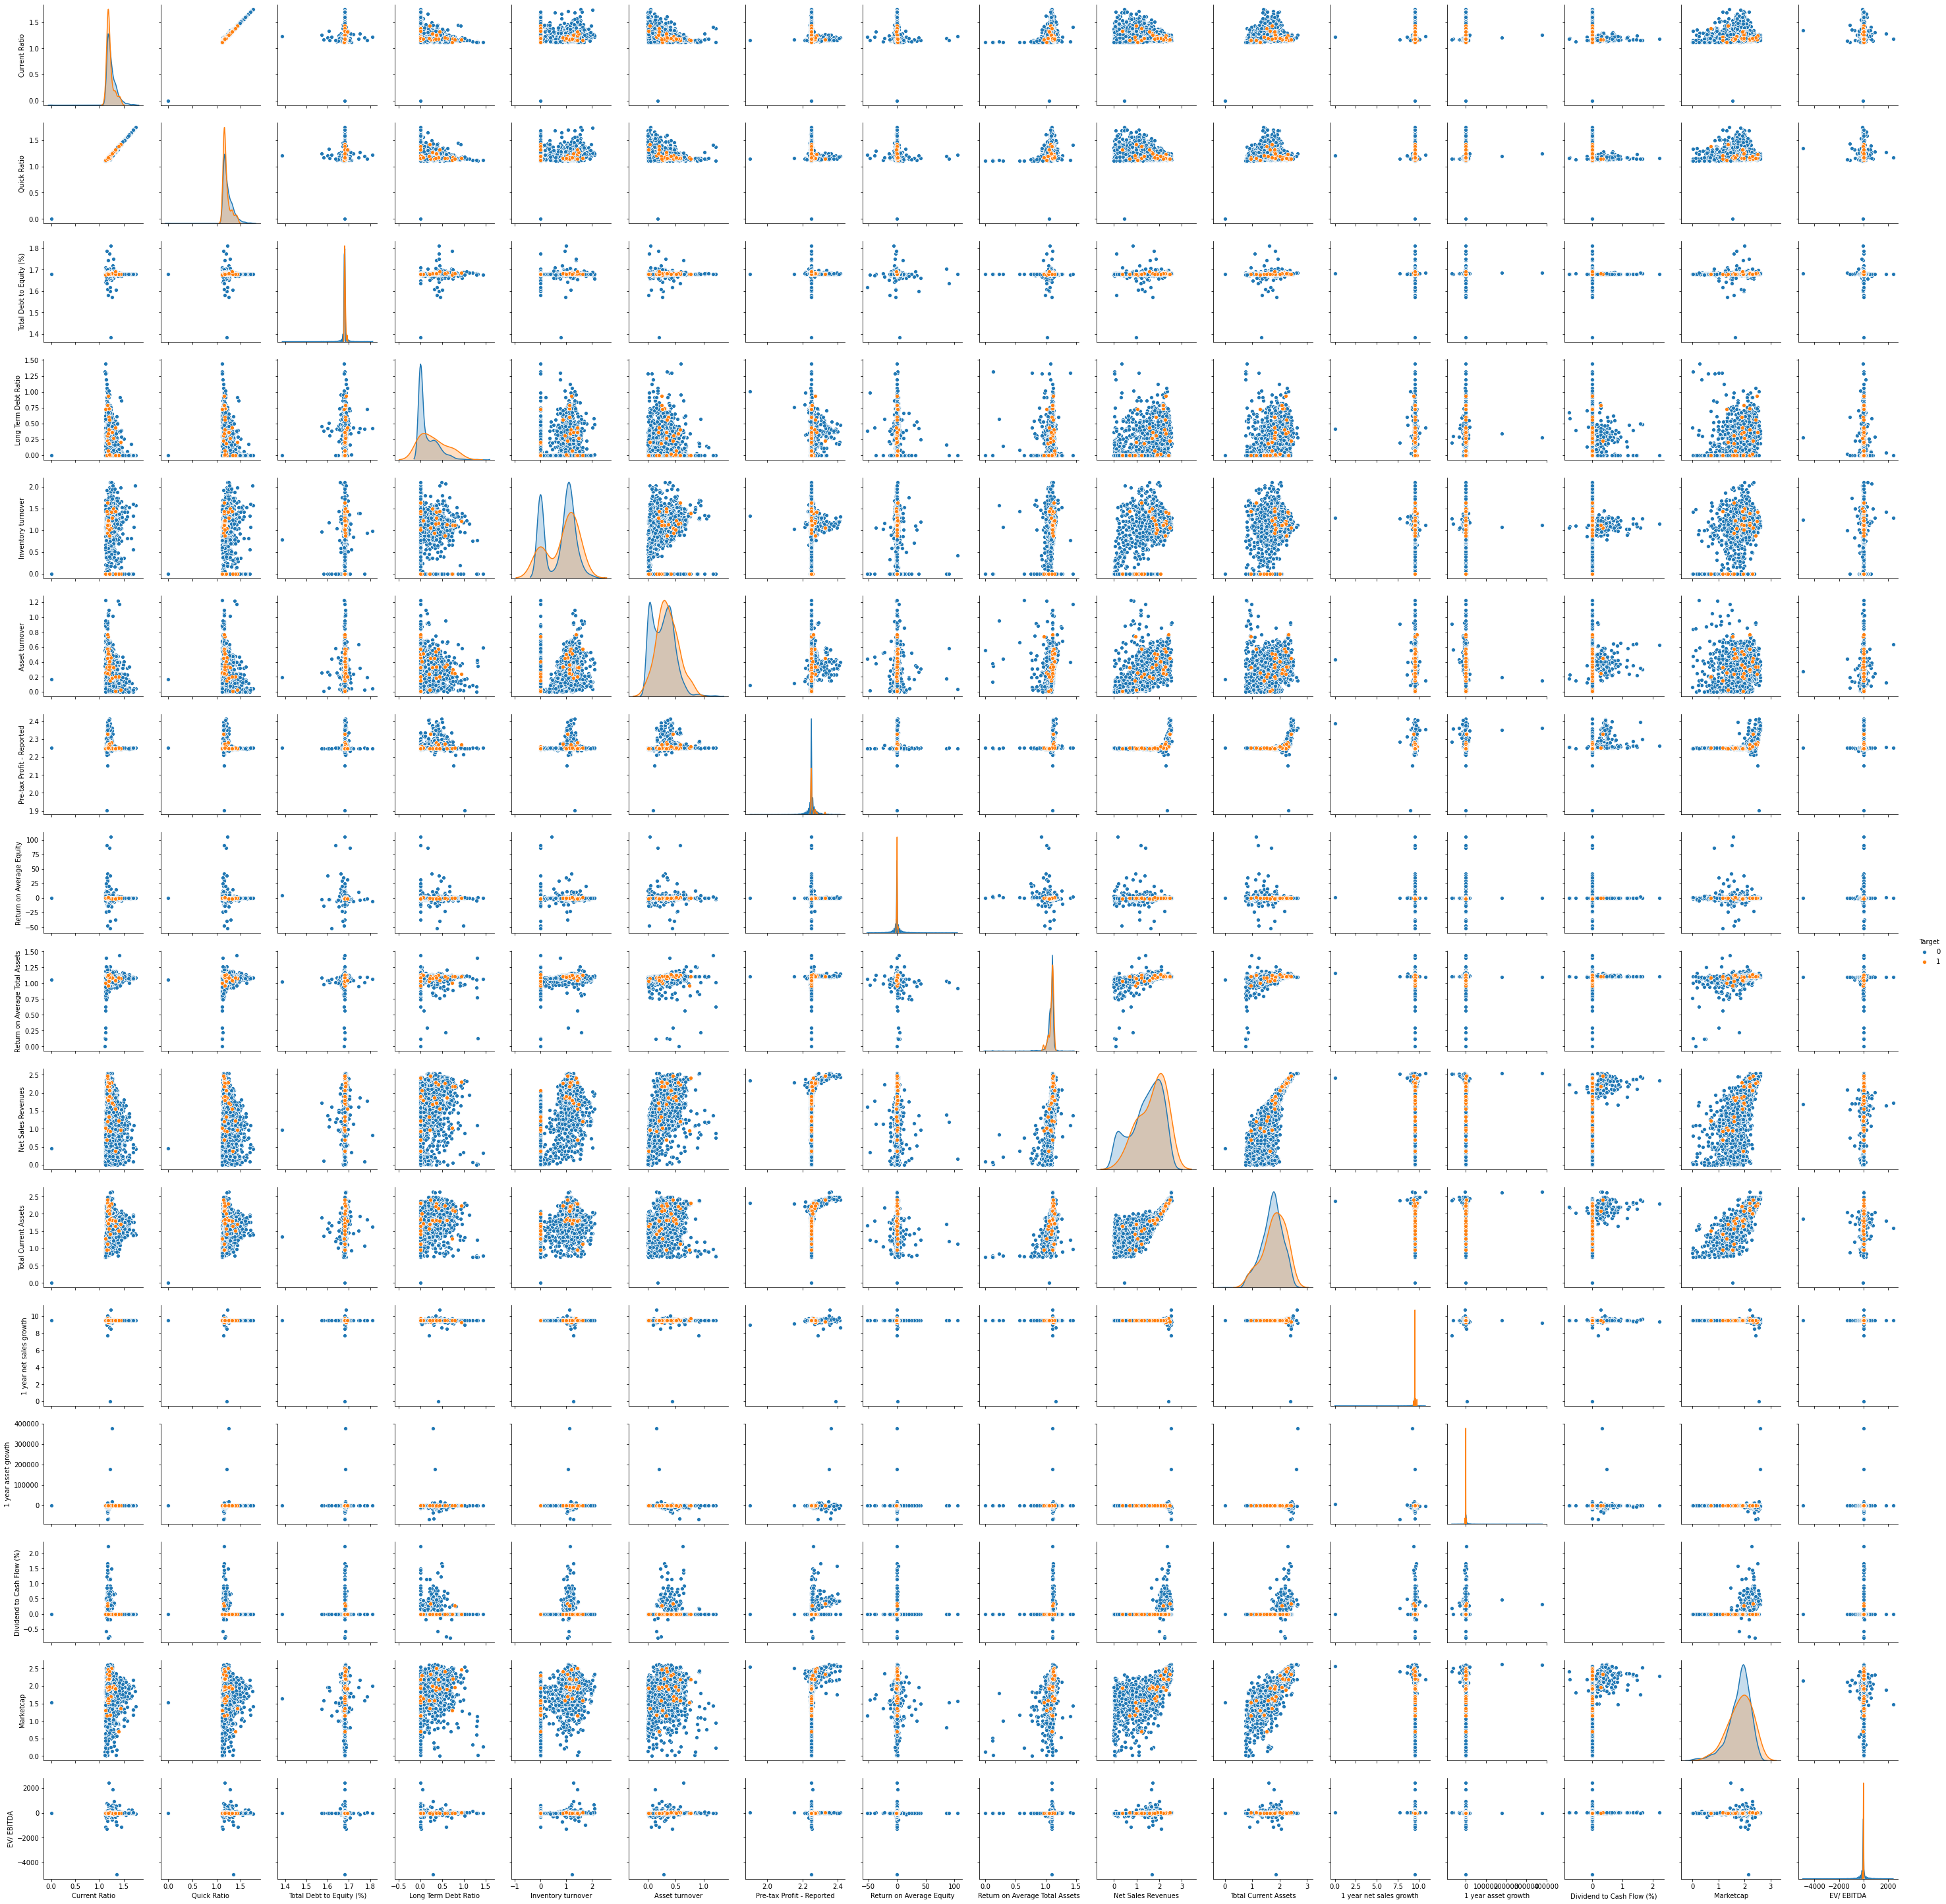

In [42]:
import seaborn as sns
sns.pairplot(ttestset, hue="Target")

In [115]:
import statsmodels.api as sm
logit_model=sm.Logit(UOy2,UOX2)
result=logit_model.fit(full_output=True)
print(result.summary2())


Optimization terminated successfully.
         Current function value: 0.524155
         Iterations 7
                                  Results: Logit
Model:                     Logit                 Pseudo R-squared:      0.177     
Dependent Variable:        Target?               AIC:                   645.2618  
Date:                      2021-03-11 21:20      BIC:                   715.2076  
No. Observations:          585                   Log-Likelihood:        -306.63   
Df Model:                  15                    LL-Null:               -372.36   
Df Residuals:              569                   LLR p-value:           1.1006e-20
Converged:                 1.0000                Scale:                 1.0000    
No. Iterations:            7.0000                                                 
----------------------------------------------------------------------------------
                                Coef.   Std.Err.    z    P>|z|    [0.025   0.975] 
-------------------

In [46]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import auc
from matplotlib import pyplot
from sklearn.model_selection import cross_val_score

# fit a model
# calculate F1 score
weights = {0:28.0, 1:1958.0}
model = LogisticRegression(solver='lbfgs',max_iter=5000,class_weight = 'balanced')
model.fit(xtrain, ytrain.values.ravel())
# predict probabilities
lr_probs = model.predict_proba(xtest)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# predict class values
yhat = model.predict(xtest)
#crossval_scores = cross_val_score(model, xtest, ytest, scoring='roc_auc', cv=10)
lr_precision, lr_recall, _ = precision_recall_curve(ytest, lr_probs)
lr_f1, lr_auc = f1_score(ytest, yhat), auc(lr_recall, lr_precision)
print('RAW',precision_recall_fscore_support(ytest,yhat,average='binary',pos_label=1))


#MODEL SMOTE DATA

model.fit(os_data_X, os_data_y)
# predict probabilities
lr_probs = model.predict_proba(xtest)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# predict class values
yhat = model.predict(xtest)
print(yhat)
lr1_precision, lr1_recall, _ = precision_recall_curve(ytest, lr_probs)
lr1_f1, lr1_auc = f1_score(ytest, yhat), auc(lr1_recall, lr1_precision)
print('smote', precision_recall_fscore_support(ytest,yhat,average='binary',pos_label=1))

#randomoversample

model.fit(os1_data_X, os1_data_y.values.ravel())
# predict probabilities
lr_probs = model.predict_proba(xtest)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# predict class values
yhat = model.predict(xtest)
lr2_precision, lr2_recall, _ = precision_recall_curve(ytest, lr_probs)
lr2_f1, lr2_auc = f1_score(ytest, yhat), auc(lr2_recall, lr2_precision)


#ADASYN

model.fit(os2_data_X, os2_data_y.values.ravel())
# predict probabilities
lr_probs = model.predict_proba(xtest)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# predict class values
yhat = model.predict(xtest)
lr3_precision, lr3_recall, _ = precision_recall_curve(ytest, lr_probs)
lr3_f1, lr3_auc = f1_score(ytest, yhat), auc(lr3_recall, lr3_precision)
print('adasyn',precision_recall_fscore_support(ytest,yhat,average='binary',pos_label=1))

#random undersample
model = LogisticRegression(max_iter=5000)
model.fit(us_data_X, us_data_y.values.ravel())
# predict probabilities
lr_probs = model.predict_proba(xtest)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# predict class values
yhat = model.predict(xtest)
lr4_precision, lr4_recall, _ = precision_recall_curve(ytest, lr_probs)
lr4_f1, lr4_auc = f1_score(ytest, yhat), auc(lr4_recall, lr4_precision)

#random over random under 
#random under, random over - even
model = LogisticRegression(max_iter=5000)
model.fit(UOX,UOy.values.ravel())
# predict probabilities
lr_probs = model.predict_proba(xtest)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# predict class values
yhat = model.predict(xtest)
lr5_precision, lr5_recall, _ = precision_recall_curve(ytest, lr_probs)
lr5_f1, lr5_auc = f1_score(ytest, yhat), auc(lr5_recall, lr5_precision)
print('ou',precision_recall_fscore_support(ytest,yhat,average='binary',pos_label=1))

#random under, random over - ueven

model.fit(UOX2,UOy2.values.ravel())
# predict probabilities
lr_probs = model.predict_proba(xtest)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# predict class values
yhat = model.predict(xtest)
lr6_precision, lr6_recall, _ = precision_recall_curve(ytest, lr_probs)
lr6_f1, lr6_auc = f1_score(ytest, yhat), auc(lr6_recall, lr6_precision)
print('ou2',precision_recall_fscore_support(ytest,yhat,average='binary',pos_label=1))

RAW (0.022288261515601784, 0.9375, 0.043541364296081284, None)
[0 1 1 0 0 0 1 1 1 0 0 1 0 0 0 0 1 1 1 0 1 1 1 1 1 0 0 0 1 0 1 0 0 0 1 0 0
 0 0 0 0 1 1 1 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 1 1 0 1 1 1 0 1
 0 1 1 1 0 0 1 0 1 1 1 0 0 1 0 0 1 0 1 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 1 0 0 0 1 0 1 0 0 1 0 0 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 0 1
 1 0 0 0 1 0 0 1 0 0 1 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 1 1 0 1
 1 1 1 1 0 1 0 0 1 0 0 0 1 1 0 0 0 0 0 0 1 0 1 0 1 1 1 1 0 1 0 1 1 0 0 1 1
 0 1 0 0 1 1 0 1 1 1 0 0 1 1 1 0 1 1 0 1 1 1 1 1 0 0 0 1 0 1 0 0 0 0 1 0 1
 0 1 0 0 0 1 1 1 1 1 0 0 0 1 1 0 0 1 1 0 1 1 0 1 0 1 1 0 0 1 1 0 0 1 1 1 0
 1 1 1 0 1 1 0 0 0 1 1 1 1 1 1 0 0 1 1 0 1 1 0 1 1 0 0 1 1 1 1 1 0 1 1 0 0
 1 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 0 1 0 1 1 0 0
 0 1 1 1 1 0 1 1 1 0 1 1 1 0 1 0 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 0 1 0 0 0 1
 1 1 1 1 1 1 0 1 0 1 0 1 1 1 1 1 1 1 0 0 1 1 0 1 0 1 0 1 0 0 0 1 1 0 1 1 1
 0 1 0 1 0 0 1 0 1 1 1 1 1 1 1 1 0 0 

C:\Users\EdwinE\AppData\Local\Continuum\anaconda3\envs\myen\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [47]:
print('Raw: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
print('SMOTE: f1=%.3f auc=%.3f' % (lr1_f1, lr1_auc))
print('Random Oversample: f1=%.3f auc=%.3f' % (lr2_f1, lr2_auc))
print('ADASYN: f1=%.3f auc=%.3f' % (lr3_f1, lr3_auc))
print('Random Undersample: f1=%.3f auc=%.3f' % (lr4_f1, lr4_auc))
print('overunder -even: f1=%.3f auc=%.3f' % (lr5_f1, lr5_auc))
print('overunder -uneven: f1=%.3f auc=%.3f' % (lr6_f1, lr6_auc))

Raw: f1=0.044 auc=0.043
SMOTE: f1=0.051 auc=0.041
Random Oversample: f1=0.043 auc=0.043
ADASYN: f1=0.046 auc=0.042
Random Undersample: f1=0.056 auc=0.029
overunder -even: f1=0.047 auc=0.037
overunder -uneven: f1=0.050 auc=0.037


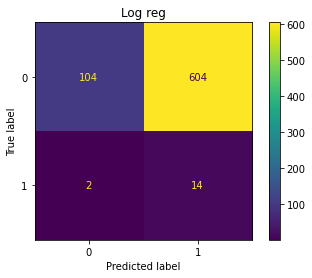

In [53]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
##MODEL RAW DATA
# fit a model
# calculate F1 score
weights = {0:195.0, 1:390.0}
model = LogisticRegression(solver='lbfgs',max_iter=5000,class_weight = 'balanced')
model.fit(UOX2, UOy2.values.ravel())
# predict probabilities
dsp = plot_confusion_matrix(model,xtest,ytest)
plt.title('Log reg')
plt.show()

In [185]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import auc

##MODEL RAW DATA
# fit a model
# calculate F1 score

model = DecisionTreeClassifier(criterion = 'gini')
model.fit(xtrain, ytrain)
# predict probabilities
lr_probs = model.predict_proba(xtest)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# predict class values
yhat = model.predict(xtest)
lr_precision, lr_recall, _ = precision_recall_curve(ytest, lr_probs)
lr_f1, lr_auc = f1_score(ytest, yhat), auc(lr_recall, lr_precision)
print('raw',precision_recall_fscore_support(ytest,yhat,average='binary',pos_label=1))
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
print(xtrain.columns)

#
#MODEL SMOTE DATA
model.fit(os_data_X, os_data_y)
# predict probabilities
lr_probs = model.predict_proba(xtest)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# predict class values
yhat = model.predict(xtest)
lr1_precision, lr1_recall, _ = precision_recall_curve(ytest, lr_probs)
lr1_f1, lr1_auc = f1_score(ytest, yhat), auc(lr1_recall, lr1_precision)
print('smote',precision_recall_fscore_support(ytest,yhat,average='binary',pos_label=1))
# summarize scores

#randomoversample
model.fit(os1_data_X, os1_data_y)
# predict probabilities
lr_probs = model.predict_proba(xtest)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# predict class values
yhat = model.predict(xtest)
lr2_precision, lr2_recall, _ = precision_recall_curve(ytest, lr_probs)
lr2_f1, lr2_auc = f1_score(ytest, yhat), auc(lr2_recall, lr2_precision)


#ADASYN
model.fit(os2_data_X, os2_data_y)
# predict probabilities
lr_probs = model.predict_proba(xtest)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# predict class values
yhat = model.predict(xtest)
lr3_precision, lr3_recall, _ = precision_recall_curve(ytest, lr_probs)
lr3_f1, lr3_auc = f1_score(ytest, yhat), auc(lr3_recall, lr3_precision)
print('adasyn',precision_recall_fscore_support(ytest,yhat,average='binary',pos_label=1))
#random undersample
model.fit(us_data_X, us_data_y)
# predict probabilities
lr_probs = model.predict_proba(xtest)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# predict class values
yhat = model.predict(xtest)
lr4_precision, lr4_recall, _ = precision_recall_curve(ytest, lr_probs)
lr4_f1, lr4_auc = f1_score(ytest, yhat), auc(lr4_recall, lr4_precision)

#random over random under 
#random under, random over - even
model.fit(UOX,UOy)
# predict probabilities
lr_probs = model.predict_proba(xtest)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# predict class values
yhat = model.predict(xtest)
lr5_precision, lr5_recall, _ = precision_recall_curve(ytest, lr_probs)
lr5_f1, lr5_auc = f1_score(ytest, yhat), auc(lr5_recall, lr5_precision)

#random under, random over - ueven
model.fit(UOX2,UOy2)
# predict probabilities
lr_probs = model.predict_proba(xtest)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# predict class values
yhat = model.predict(xtest)
lr6_precision, lr6_recall, _ = precision_recall_curve(ytest, lr_probs)
lr6_f1, lr6_auc = f1_score(ytest, yhat), auc(lr6_recall, lr6_precision)
print('ou',precision_recall_fscore_support(ytest,yhat,average='binary',pos_label=1))

raw (0.06944444444444445, 0.45454545454545453, 0.12048192771084337, None)
Feature: 0, Score: 0.05731
Feature: 1, Score: 0.14910
Feature: 2, Score: 0.17787
Feature: 3, Score: 0.04570
Feature: 4, Score: 0.00388
Feature: 5, Score: 0.00000
Feature: 6, Score: 0.04644
Feature: 7, Score: 0.25087
Feature: 8, Score: 0.10025
Feature: 9, Score: 0.04748
Feature: 10, Score: 0.03085
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.02009
Feature: 13, Score: 0.04279
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.02737
Index(['Current Ratio', 'Quick Ratio', 'Total Debt to Equity (%)',
       'Long Term Debt Ratio', 'Long Term Debt Ratio2', 'Inventory turnover',
       'Asset turnover', 'Pre-tax Profit - Reported',
       'Return on Average Equity', 'Return on Average Total Assets',
       'Net Sales Revenues', 'Total Current Assets', '1 year net sales growth',
       '1 year asset growth', 'Dividend to Cash Flow (%)', 'Marketcap'],
      dtype='object')
smote (0.03125, 0.09090909090909091, 0.046511

In [163]:
print("SCORE FOR DECISION TREE MODELS")
print('Raw: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
print('SMOTE: f1=%.3f auc=%.3f' % (lr1_f1, lr1_auc))
print('Random Oversample: f1=%.3f auc=%.3f' % (lr2_f1, lr2_auc))
print('ADASYN: f1=%.3f auc=%.3f' % (lr3_f1, lr3_auc))
print('Random Undersample: f1=%.3f auc=%.3f' % (lr4_f1, lr4_auc))
print('Random under over even: f1=%.3f auc=%.3f' % (lr5_f1, lr5_auc))
print('Random under over uneven: f1=%.3f auc=%.3f' % (lr6_f1, lr6_auc))

SCORE FOR DECISION TREE MODELS
Raw: f1=0.128 auc=0.186
SMOTE: f1=0.049 auc=0.073
Random Oversample: f1=0.000 auc=0.512
ADASYN: f1=0.054 auc=0.292
Random Undersample: f1=0.047 auc=0.290
Random under over even: f1=0.000 auc=0.012
Random under over uneven: f1=0.056 auc=0.426


raw (0.08333333333333333, 0.2727272727272727, 0.1276595744680851, None)


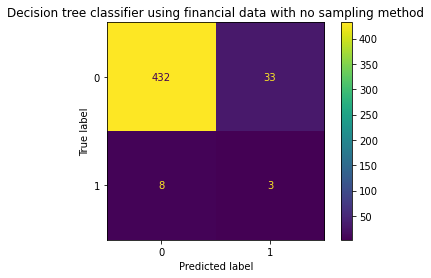

In [228]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
##MODEL RAW DATA
# fit a model
# calculate F1 score
weights = {0:195.0, 1:390.0}
model = DecisionTreeClassifier(criterion = 'gini')
model.fit(xtrain, ytrain)
lr_probs = model.predict_proba(xtest)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# predict class values
yhat = model.predict(xtest)
lr_precision, lr_recall, _ = precision_recall_curve(ytest, lr_probs)
lr_f1, lr_auc = f1_score(ytest, yhat), auc(lr_recall, lr_precision)
print('raw',precision_recall_fscore_support(ytest,yhat,average='binary',pos_label=1))

# predict probabilities
dsp = plot_confusion_matrix(model,xtest,ytest)
plt.title('Decision tree classifier using financial data with no sampling method')
plt.show()

In [241]:
DTmatch = pd.DataFrame(yhat)
print(DTmatch)
print(DTtet2['Company'])
result = pd.concat([DTmatch, DTtet2['Company'].reset_index(drop=True)], axis=1,ignore_index=True)
result.columns = ['pred','Co']
display(result.query('pred ==1'))

     0
0    0
1    1
2    0
3    0
4    0
..  ..
471  0
472  0
473  0
474  0
475  0

[476 rows x 1 columns]
8381                       3M
8382                    3SBio
8383                 4basebio
8388               AB Science
8392      Abbott Laboratories
                 ...         
11152    Zeria Pharmaceutical
11164                 Zogenix
11167            Zydus Cadila
11168      Zyla Life Sciences
11169               Zymeworks
Name: Company, Length: 476, dtype: object


,pred,Co
1,1,3SBio
13,1,Acorda Therapeutics
24,1,Agenus
28,1,Ajinomoto
29,1,Akorn
31,1,Alexion Pharmaceuticals
38,1,Alliance Pharma
41,1,AMAG Pharmaceuticals
47,1,ANI Pharmaceuticals
48,1,Antibe Therapeutics


raw (0.08333333333333333, 0.2727272727272727, 0.1276595744680851, None)


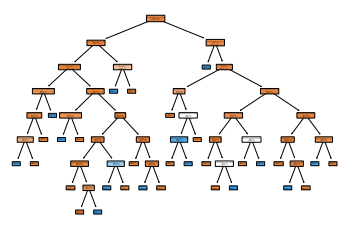

<Figure size 28800x28800 with 0 Axes>

<Figure size 2880x2880 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [65]:
from sklearn import tree
model = tree.DecisionTreeClassifier(criterion = 'gini')
model.fit(xtrain, ytrain)
lr_probs = model.predict_proba(xtest)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# predict class values
yhat = model.predict(xtest)
lr_precision, lr_recall, _ = precision_recall_curve(ytest, lr_probs)
lr_f1, lr_auc = f1_score(ytest, yhat), auc(lr_recall, lr_precision)
print('raw',precision_recall_fscore_support(ytest,yhat,average='binary',pos_label=1))
tree.plot_tree(model,feature_names = os_data_X.columns, 
              
               rounded=True, 
               filled = True)
plt.figure(figsize = (400, 400))
plt.show()
plt.figure(figsize = (40, 40))
plt.show()
plt.savefig('tree_high_dpi', dpi=100)

In [59]:
plt.figure(figsize = (40, 40))
plt.show()
plt.savefig('C:\Users\EdwinE\Desktop\DissProject\Financial data\tree_high_dpi', dpi=100)

SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 2-3: truncated \UXXXXXXXX escape (<ipython-input-59-3aec4bab04fe>, line 3)

In [112]:
from sklearn import svm
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from matplotlib import pyplot
from sklearn.model_selection import cross_val_score

##MODEL RAW DATA
# fit a model
# calculate F1 score
weights = {0:33.0, 1:1866.0}
model = svm.SVC(kernel = 'sigmoid',probability=True, class_weight='balanced', random_state = 0)
model.fit(xtrain, ytrain.values.ravel())
# predict probabilities
lr_probs = model.predict_proba(xtest)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# predict class values
yhat = model.predict(xtest)
lr_precision, lr_recall, _ = precision_recall_curve(ytest, lr_probs)
lr_f1, lr_auc = f1_score(ytest, yhat), auc(lr_recall, lr_precision)
print('raw',precision_recall_fscore_support(ytest,yhat,average='binary',pos_label=1))
#
#MODEL SMOTE DATA
model.fit(os_data_X, os_data_y.values.ravel())
# predict probabilities
lr_probs = model.predict_proba(xtest)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# predict class values
yhat = model.predict(xtest)
lr1_precision, lr1_recall, _ = precision_recall_curve(ytest, lr_probs)
lr1_f1, lr1_auc = f1_score(ytest, yhat), auc(lr1_recall, lr1_precision)
print('smote',precision_recall_fscore_support(ytest,yhat,average='binary',pos_label=1))
# summarize scores

#randomoversample
model.fit(os1_data_X, os1_data_y.values.ravel())
# predict probabilities
lr_probs = model.predict_proba(xtest)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# predict class values
yhat = model.predict(xtest)
lr2_precision, lr2_recall, _ = precision_recall_curve(ytest, lr_probs)
lr2_f1, lr2_auc = f1_score(ytest, yhat), auc(lr2_recall, lr2_precision)

#ADASYN
model.fit(os2_data_X, os2_data_y.values.ravel())
# predict probabilities
lr_probs = model.predict_proba(xtest)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# predict class values
yhat = model.predict(xtest)
lr3_precision, lr3_recall, _ = precision_recall_curve(ytest, lr_probs)
lr3_f1, lr3_auc = f1_score(ytest, yhat), auc(lr3_recall, lr3_precision)
print('adasyn',precision_recall_fscore_support(ytest,yhat,average='binary',pos_label=1))

#random undersample
model.fit(us_data_X, us_data_y.values.ravel())
# predict probabilities
lr_probs = model.predict_proba(xtest)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# predict class values
yhat = model.predict(xtest)
lr4_precision, lr4_recall, _ = precision_recall_curve(ytest, lr_probs)
lr4_f1, lr4_auc = f1_score(ytest, yhat), auc(lr4_recall, lr4_precision)

#random over random under 
#random under, random over - even
model.fit(UOX,UOy.values.ravel())
# predict probabilities
lr_probs = model.predict_proba(xtest)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# predict class values
yhat = model.predict(xtest)
lr5_precision, lr5_recall, _ = precision_recall_curve(ytest, lr_probs)
lr5_f1, lr5_auc = f1_score(ytest, yhat), auc(lr5_recall, lr5_precision)

#random under, random over - ueven
model.fit(UOX2,UOy2.values.ravel())
# predict probabilities
lr_probs = model.predict_proba(xtest)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# predict class values
yhat = model.predict(xtest)
lr6_precision, lr6_recall, _ = precision_recall_curve(ytest, lr_probs)
lr6_f1, lr6_auc = f1_score(ytest, yhat), auc(lr6_recall, lr6_precision)
print('uo',precision_recall_fscore_support(ytest,yhat,average='binary',pos_label=1))

raw (0.022670025188916875, 0.5625, 0.04358353510895883, None)
smote (0.028199566160520606, 0.8125, 0.05450733752620545, None)
adasyn (0.027257240204429302, 1.0, 0.05306799336650083, None)
uo (0.022284122562674095, 1.0, 0.043596730245231606, None)


In [113]:
print("SCORE SVC MODELS")
print('Raw: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
print('SMOTE: f1=%.3f auc=%.3f' % (lr1_f1, lr1_auc))
print('Random Oversample: f1=%.3f auc=%.3f' % (lr2_f1, lr2_auc))
print('ADASYN: f1=%.3f auc=%.3f' % (lr3_f1, lr3_auc))
print('Random Undersample: f1=%.3f auc=%.3f' % (lr4_f1, lr4_auc))
print('Random under over even: f1=%.3f auc=%.3f' % (lr5_f1, lr5_auc))
print('Random under over uneven: f1=%.3f auc=%.3f' % (lr6_f1, lr6_auc))

SCORE SVC MODELS
Raw: f1=0.044 auc=0.017
SMOTE: f1=0.055 auc=0.017
Random Oversample: f1=0.043 auc=0.511
ADASYN: f1=0.053 auc=0.511
Random Undersample: f1=0.043 auc=0.511
Random under over even: f1=0.044 auc=0.511
Random under over uneven: f1=0.044 auc=0.017


In [190]:
import wittgenstein as lw
from sklearn.model_selection import GridSearchCV
model = lw.RIPPER(prune_size =0.01, k =20, random_state=42)
model.fit(xtrain, ytrain, require_min_samples=False)
# predict probabilities
lr_probs = model.predict_proba(xtest)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# predict class values
yhat = model.predict(xtest)
lr_precision, lr_recall, _ = precision_recall_curve(ytest, lr_probs)
lr_f1, lr_auc = f1_score(ytest, yhat), auc(lr_recall, lr_precision)
print('raw',precision_recall_fscore_support(ytest,yhat,average='binary',pos_label=1))
#
#MODEL SMOTE DATA
model.fit(os_data_X, os_data_y, require_min_samples=False)
# predict probabilities
lr_probs = model.predict_proba(xtest)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# predict class values
yhat = model.predict(xtest)
lr1_precision, lr1_recall, _ = precision_recall_curve(ytest, lr_probs)
lr1_f1, lr1_auc = f1_score(ytest, yhat), auc(lr1_recall, lr1_precision)
print('smote',precision_recall_fscore_support(ytest,yhat,average='binary',pos_label=1))
# summarize scores

#randomoversample
model.fit(os1_data_X, os1_data_y, require_min_samples=False)
# predict probabilities
lr_probs = model.predict_proba(xtest)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# predict class values
yhat = model.predict(xtest)
lr2_precision, lr2_recall, _ = precision_recall_curve(ytest, lr_probs)
lr2_f1, lr2_auc = f1_score(ytest, yhat), auc(lr2_recall, lr2_precision)


#ADASYN
model.fit(os2_data_X, os2_data_y, require_min_samples=False)
# predict probabilities
lr_probs = model.predict_proba(xtest)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# predict class values
yhat = model.predict(xtest)
lr3_precision, lr3_recall, _ = precision_recall_curve(ytest, lr_probs)
lr3_f1, lr3_auc = f1_score(ytest, yhat), auc(lr3_recall, lr3_precision)
print('adasyn',precision_recall_fscore_support(ytest,yhat,average='binary',pos_label=1))

#random undersample
model.fit(us_data_X, us_data_y, require_min_samples=False)
# predict probabilities
lr_probs = model.predict_proba(xtest)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# predict class values
yhat = model.predict(xtest)
lr4_precision, lr4_recall, _ = precision_recall_curve(ytest, lr_probs)
lr4_f1, lr4_auc = f1_score(ytest, yhat), auc(lr4_recall, lr4_precision)

#random under, random over - even

model.fit(UOX,UOy.values.ravel(), require_min_samples=False)
# predict probabilities
lr_probs = model.predict_proba(xtest)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# predict class values
yhat = model.predict(xtest)
lr5_precision, lr5_recall, _ = precision_recall_curve(ytest, lr_probs)
lr5_f1, lr5_auc = f1_score(ytest, yhat), auc(lr5_recall, lr5_precision)

#random under, random over - ueven

model.fit(UOX2,UOy2.values.ravel(), require_min_samples=False)
# predict probabilities
lr_probs = model.predict_proba(xtest)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# predict class values
yhat = model.predict(xtest)
lr6_precision, lr6_recall, _ = precision_recall_curve(ytest, lr_probs)
lr6_f1, lr6_auc = f1_score(ytest, yhat), auc(lr6_recall, lr6_precision)
print('uo',precision_recall_fscore_support(ytest,yhat,average='binary',pos_label=1))

raw (0.0, 0.0, 0.0, None)
smote (0.03773584905660377, 0.36363636363636365, 0.06837606837606837, None)
adasyn (0.023157894736842106, 1.0, 0.04526748971193416, None)


base.py: .predict_proba: RuntimeWarning: 
Some examples lacked any rule with sufficient sample size to predict_proba: [32, 117, 186, 223, 236, 245, 262, 290, 371, 379, 404, 435, 443]
 Consider running recalibrate_proba with smaller param min_samples, or set require_min_samples=False



uo (0.023206751054852322, 1.0, 0.04536082474226804, None)


In [191]:
print("SCORE RIPPER MODELS")
print('Raw: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
print('SMOTE: f1=%.3f auc=%.3f' % (lr1_f1, lr1_auc))
print('Random Oversample: f1=%.3f auc=%.3f' % (lr2_f1, lr2_auc))
print('ADASYN: f1=%.3f auc=%.3f' % (lr3_f1, lr3_auc))
print('Random Undersample: f1=%.3f auc=%.3f' % (lr4_f1, lr4_auc))
print('Random under over even: f1=%.3f auc=%.3f' % (lr5_f1, lr5_auc))
print('Random under over uneven: f1=%.3f auc=%.3f' % (lr6_f1, lr6_auc))

SCORE RIPPER MODELS
Raw: f1=0.000 auc=0.012
SMOTE: f1=0.068 auc=0.076
Random Oversample: f1=0.046 auc=0.022
ADASYN: f1=0.045 auc=0.012
Random Undersample: f1=0.046 auc=0.512
Random under over even: f1=0.032 auc=0.069
Random under over uneven: f1=0.045 auc=0.083


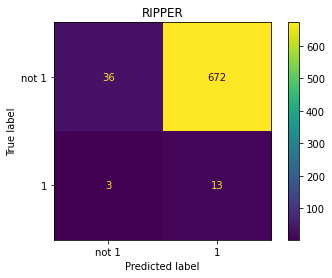

SMOTE: f1=0.037 auc=0.418


In [84]:
param_grid = {"prune_size": [0.01], "k": [10]}
classifier = lw.RIPPER(prune_size =0.01, k =10, random_state=42)
model = GridSearchCV(estimator=classifier, param_grid=param_grid)
model.fit(xtrain,ytrain, require_min_samples=False)
# predict probabilities
lr_probs = model.predict_proba(xtest)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# predict class values
yhat = model.predict(xtest)
lr_precision, lr_recall, _ = precision_recall_curve(ytest, lr_probs)
lr_f1, lr_auc = f1_score(ytest, yhat), auc(lr_recall, lr_precision)
from sklearn.metrics import plot_confusion_matrix
dsp = plot_confusion_matrix(model,xtest,ytest)
plt.title('RIPPER')
plt.show()
print('SMOTE: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))


In [144]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
model = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=3, random_state=0)
model.fit(xtrain, ytrain.values.ravel())
# predict probabilities
lr_probs = model.predict_proba(xtest)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# predict class values
yhat = model.predict(xtest)
lr_precision, lr_recall, _ = precision_recall_curve(ytest, lr_probs)
lr_f1, lr_auc = f1_score(ytest, yhat), auc(lr_recall, lr_precision)
print('raw',precision_recall_fscore_support(ytest,yhat,average='binary',pos_label=1))

#
#MODEL SMOTE DATA
model.fit(os_data_X, os_data_y.values.ravel())
# predict probabilities
lr_probs = model.predict_proba(xtest)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# predict class values
yhat = model.predict(xtest)
lr1_precision, lr1_recall, _ = precision_recall_curve(ytest, lr_probs)
lr1_f1, lr1_auc = f1_score(ytest, yhat), auc(lr1_recall, lr1_precision)
print('smote',precision_recall_fscore_support(ytest,yhat,average='binary',pos_label=1))
# summarize scores

#randomoversample
model.fit(os1_data_X, os1_data_y.values.ravel())
# predict probabilities
lr_probs = model.predict_proba(xtest)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# predict class values
yhat = model.predict(xtest)
lr2_precision, lr2_recall, _ = precision_recall_curve(ytest, lr_probs)
lr2_f1, lr2_auc = f1_score(ytest, yhat), auc(lr2_recall, lr2_precision)


#ADASYN
model.fit(os2_data_X, os2_data_y.values.ravel())
# predict probabilities
lr_probs = model.predict_proba(xtest)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# predict class values
yhat = model.predict(xtest)
lr3_precision, lr3_recall, _ = precision_recall_curve(ytest, lr_probs)
lr3_f1, lr3_auc = f1_score(ytest, yhat), auc(lr3_recall, lr3_precision)
print('adasyn',precision_recall_fscore_support(ytest,yhat,average='binary',pos_label=1))
#random undersample
model.fit(us_data_X, us_data_y.values.ravel())
# predict probabilities
lr_probs = model.predict_proba(xtest)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# predict class values
yhat = model.predict(xtest)
lr4_precision, lr4_recall, _ = precision_recall_curve(ytest, lr_probs)
lr4_f1, lr4_auc = f1_score(ytest, yhat), auc(lr4_recall, lr4_precision)

#random over random under 
#random under, random over - even
model.fit(UOX,UOy.values.ravel())
# predict probabilities
lr_probs = model.predict_proba(xtest)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# predict class values
yhat = model.predict(xtest)
lr5_precision, lr5_recall, _ = precision_recall_curve(ytest, lr_probs)
lr5_f1, lr5_auc = f1_score(ytest, yhat), auc(lr5_recall, lr5_precision)

#random under, random over - ueven
model.fit(UOX2,UOy2.values.ravel())
# predict probabilities
lr_probs = model.predict_proba(xtest)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# predict class values
yhat = model.predict(xtest)
lr6_precision, lr6_recall, _ = precision_recall_curve(ytest, lr_probs)
lr6_f1, lr6_auc = f1_score(ytest, yhat), auc(lr6_recall, lr6_precision)
print('ou',precision_recall_fscore_support(ytest,yhat,average='binary',pos_label=1))

raw (0.022058823529411766, 0.5454545454545454, 0.04240282685512367, None)


C:\Users\EdwinE\AppData\Local\Continuum\anaconda3\envs\myen\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


smote (0.0, 0.0, 0.0, None)


C:\Users\EdwinE\AppData\Local\Continuum\anaconda3\envs\myen\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


adasyn (0.0, 0.0, 0.0, None)
ou (0.02127659574468085, 0.2727272727272727, 0.03947368421052632, None)


In [145]:
print("SCORE KN MODELS")
print('Raw: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
print('SMOTE: f1=%.3f auc=%.3f' % (lr1_f1, lr1_auc))
print('Random Oversample: f1=%.3f auc=%.3f' % (lr2_f1, lr2_auc))
print('ADASYN: f1=%.3f auc=%.3f' % (lr3_f1, lr3_auc))
print('Random Undersample: f1=%.3f auc=%.3f' % (lr4_f1, lr4_auc))
print('Random under over even: f1=%.3f auc=%.3f' % (lr5_f1, lr5_auc))
print('Random under over uneven: f1=%.3f auc=%.3f' % (lr6_f1, lr6_auc))

SCORE KN MODELS
Raw: f1=0.042 auc=0.022
SMOTE: f1=0.000 auc=0.022
Random Oversample: f1=0.000 auc=0.030
ADASYN: f1=0.000 auc=0.031
Random Undersample: f1=0.045 auc=0.125
Random under over even: f1=0.044 auc=0.024
Random under over uneven: f1=0.039 auc=0.023


In [180]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
model = RandomForestClassifier(max_depth=3, random_state=0, class_weight = 'balanced',max_features = 'None')
model.fit(xtrain, ytrain.values.ravel())
# predict probabilities
lr_probs = model.predict_proba(xtest)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# predict class values
yhat = model.predict(xtest)
lr_precision, lr_recall, _ = precision_recall_curve(ytest, lr_probs)
lr_f1, lr_auc = f1_score(ytest, yhat), auc(lr_recall, lr_precision)
print('raw',precision_recall_fscore_support(ytest,yhat,average='binary',pos_label=1))

#
#MODEL SMOTE DATA
model.fit(os_data_X, os_data_y.values.ravel())
# predict probabilities
lr_probs = model.predict_proba(xtest)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# predict class values
yhat = model.predict(xtest)
lr1_precision, lr1_recall, _ = precision_recall_curve(ytest, lr_probs)
lr1_f1, lr1_auc = f1_score(ytest, yhat), auc(lr1_recall, lr1_precision)
print('smote',precision_recall_fscore_support(ytest,yhat,average='binary',pos_label=1))
# summarize scores

#randomoversample
model.fit(os1_data_X, os1_data_y.values.ravel())
# predict probabilities
lr_probs = model.predict_proba(xtest)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# predict class values
yhat = model.predict(xtest)
lr2_precision, lr2_recall, _ = precision_recall_curve(ytest, lr_probs)
lr2_f1, lr2_auc = f1_score(ytest, yhat), auc(lr2_recall, lr2_precision)


#ADASYN
model.fit(os2_data_X, os2_data_y.values.ravel())
# predict probabilities
lr_probs = model.predict_proba(xtest)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# predict class values
yhat = model.predict(xtest)
lr3_precision, lr3_recall, _ = precision_recall_curve(ytest, lr_probs)
lr3_f1, lr3_auc = f1_score(ytest, yhat), auc(lr3_recall, lr3_precision)
print('adasyn',precision_recall_fscore_support(ytest,yhat,average='binary',pos_label=1))
#random undersample
model.fit(us_data_X, us_data_y.values.ravel())
# predict probabilities
lr_probs = model.predict_proba(xtest)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# predict class values
yhat = model.predict(xtest)
lr4_precision, lr4_recall, _ = precision_recall_curve(ytest, lr_probs)
lr4_f1, lr4_auc = f1_score(ytest, yhat), auc(lr4_recall, lr4_precision)

#random over random under 
#random under, random over - even
model.fit(UOX,UOy.values.ravel())
# predict probabilities
lr_probs = model.predict_proba(xtest)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# predict class values
yhat = model.predict(xtest)
lr5_precision, lr5_recall, _ = precision_recall_curve(ytest, lr_probs)
lr5_f1, lr5_auc = f1_score(ytest, yhat), auc(lr5_recall, lr5_precision)

#random under, random over - ueven
model.fit(UOX2,UOy2.values.ravel())
# predict probabilities
lr_probs = model.predict_proba(xtest)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# predict class values
yhat = model.predict(xtest)
lr6_precision, lr6_recall, _ = precision_recall_curve(ytest, lr_probs)
lr6_f1, lr6_auc = f1_score(ytest, yhat), auc(lr6_recall, lr6_precision)
print('ou',precision_recall_fscore_support(ytest,yhat,average='binary',pos_label=1))

ValueError: Invalid value for max_features. Allowed string values are 'auto', 'sqrt' or 'log2'.

In [ ]:
#ROC curves
from matplotlib import pyplot
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
# plot no skill and model roc curves
def plot_roc_curve(test_y, naive_probs, model_probs):
	# plot naive skill roc curve
	fpr, tpr, _ = roc_curve(test_y, naive_probs)
	pyplot.plot(fpr, tpr, linestyle='--', label='No Skill')
	# plot model roc curve
	fpr, tpr, _ = roc_curve(test_y, model_probs)
	pyplot.plot(fpr, tpr, marker='.', label='Logistic')
	# axis labels
	pyplot.xlabel('False Positive Rate')
	pyplot.ylabel('True Positive Rate')
	# show the legend
	pyplot.legend()
	# show the plot
	pyplot.show()
    
# no skill model, stratified random class predictions
model = DummyClassifier(strategy='stratified')
model.fit(UOX, UOy)
yhat = model.predict_proba(xtest)
naive_probs = yhat[:, 1]
# calculate roc auc
roc_auc = roc_auc_score(ytest, naive_probs)
print('No Skill ROC AUC %.3f' % roc_auc)
# skilled model
model = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=3, random_state=0)
model.fit(UOX, UOy)
yhat = model.predict_proba(xtest)
model_probs = yhat[:, 1]
# calculate roc auc
roc_auc = roc_auc_score(ytest, model_probs)
print('Logistic ROC AUC %.3f' % roc_auc)
# plot roc curves
plot_roc_curve(ytest, naive_probs, model_probs)



In [ ]:
# plot no skill and model precision-recall curves
def plot_pr_curve(test_y, model_probs):
	# calculate the no skill line as the proportion of the positive class
	no_skill = 9/335
	# plot the no skill precision-recall curve
	pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
	# plot model precision-recall curve
	precision, recall, _ = precision_recall_curve(ytest, model_probs)
	pyplot.plot(recall, precision, marker='.', label='Logistic')
	# axis labels
	pyplot.xlabel('Recall')
	pyplot.ylabel('Precision')
	# show the legend
	pyplot.legend()
	# show the plot
	pyplot.show()



# generate 2 class dataset
# no skill model, stratified random class predictions
model = DummyClassifier(strategy='stratified')
model.fit(xtrain, ytrain.values.ravel())
yhat = model.predict_proba(xtest)
naive_probs = yhat[:, 1]
# calculate the precision-recall auc
precision, recall, _ = precision_recall_curve(ytest, naive_probs)
auc_score = auc(recall, precision)
print('No Skill PR AUC: %.3f' % auc_score)
# fit a model
model = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=3, random_state=0)
model.fit(xtrain, ytrain.values.ravel())
yhat = model.predict_proba(xtest)
model_probs = yhat[:, 1]
# calculate the precision-recall auc
precision, recall, _ = precision_recall_curve(ytest, model_probs)
auc_score = auc(recall, precision)
print('Logistic PR AUC: %.3f' % auc_score)
# plot precision-recall curves
plot_pr_curve(ytest, model_probs)